Additive seasonality in time series refers to a type of seasonal pattern where the seasonal effects are added to the underlying trend of the data. In other words, the seasonal component is treated as an additional, constant value that contributes to the overall value of the time series at specific time points.  Additive seasonality is one of the 2 main types of seaosnal patterns, the other being multiplicative seasonality

Mathematically for a time series observation y(t) at time t, the additive seasonailty can be representive as follows:
y(t) = Trend(t) +Seasonality(t) + Error(t)

Where



*   Trend(t) represents the underlying trend of the time sereis which captures the
long-term changes or growth over time

*   Seasonality(T) represents the seaonal component at time t which is constant across various seasonal periods (e.g, day of the week, months, etc.)
*   Error (t) is te random error term or noise in the data that can not explained by the trend or seasonality


Characteristics of Additive Seasonality



*   Constant Amplitude: In an additive seasonal pattern , the seasonal component has a constant amplitude throughout the time series. This  means  that seasonal effect remains the same regradless of the trend level.

*   Linear Impact: The seasonal component has a linear impact on the time series. It is added to the trend in a straighforward manner making it easier to interpret and model


Additive seasonality is commonly observed in various time series data such as Weekly sales data, temperature data and Website trafic


In contrast to additive seasonality, multiplicative seasonality includes multiplicative relationshop between the seasonal component and the trend, where the seasoanl effects change proportionally with the trend level. The choice between additive and multiplicaitve seasonality depends on the characteristics of the time series data and can have implications for forecasting and time series modeling techniques.







In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

model_a will indicate that it is our additive model and then model_m is for multiplicative

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/xvwqa2xp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/qxloir9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85224', 'data', 'file=/tmp/tmp8wfvctnl/xvwqa2xp.json', 'init=/tmp/tmp8wfvctnl/qxloir9j.json', 'output', 'file=/tmp/tmp8wfvctnl/prophet_modeld2p94oib/prophet_model-20230727095455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:54:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:54:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


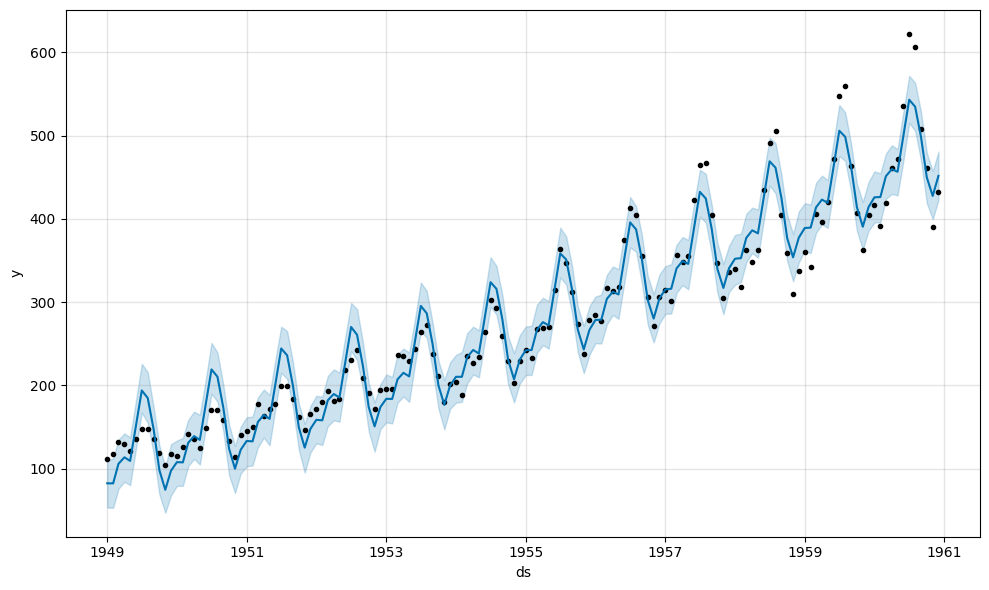

In [4]:
model_a = Prophet(seasonality_mode='additive',
                  yearly_seasonality=4)
model_a.fit(df)
forecast_a = model_a.predict()
fig_a = model_a.plot(forecast_a)
plt.show()

When we instantiate the Prophet object, we explicitly declare seasonality_mode as additive for clarity purpose. By default, if no seasonality_mode is stated, then Prophet will automatically select 'additive'. Also note that we set yearly_seasonality = 4. This merely sets the Fourier order for the curve, but
do not worry about it.


After creating the Prophet model, we need to fit and predict it and then plot the forecast


As can be seen from the above result, early in the data in 1949, 1951, and 1952. Prophet's predicted values (the solid line) have large seasonal swings that are more extrem than the data (the dots) indicates. In 1958, 1959 and 1960, Prophet predicted seasonality is less extreme than the data indicates. The seasonal spread of the data is increasing but we have predicted it to be constant. That is the mistale of choosing additive seasoanlity when multiplicate seasonality is requred

It is the time to use the same code but change the additive to multiplicative.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/tpbkfami.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/pbrmaouu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89988', 'data', 'file=/tmp/tmp8wfvctnl/tpbkfami.json', 'init=/tmp/tmp8wfvctnl/pbrmaouu.json', 'output', 'file=/tmp/tmp8wfvctnl/prophet_model3oa1pdxx/prophet_model-20230727095455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:54:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:54:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


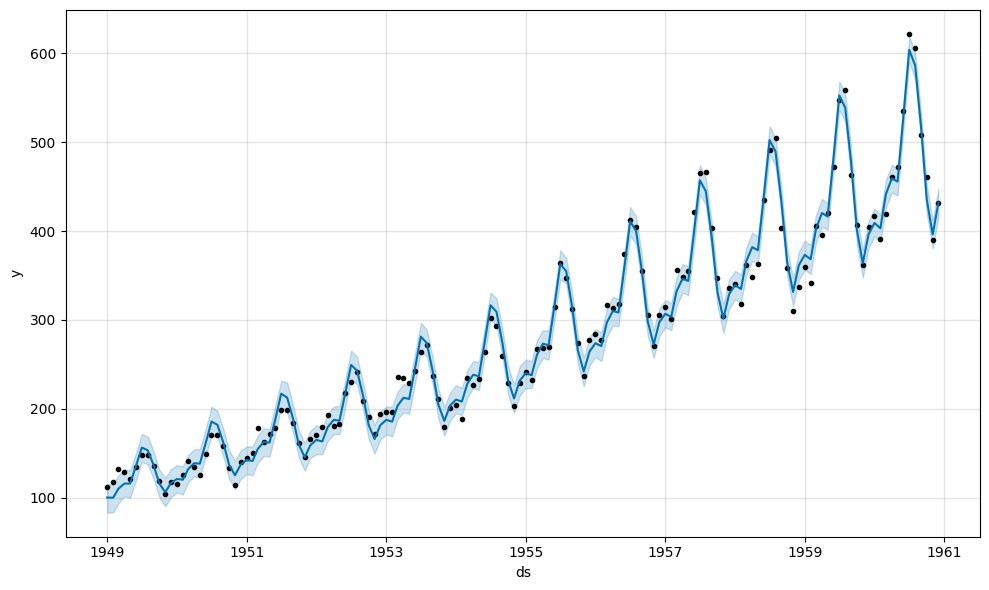

In [5]:
model_m = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=4)
model_m.fit(df)
forecast_m = model_m.predict()
fig_m = model_m.plot(forecast_m)
plt.show()

This is much better fit. Prophet matches the growth of the seasonality swings with the growth of the overall trend.


It is a time to plot the component

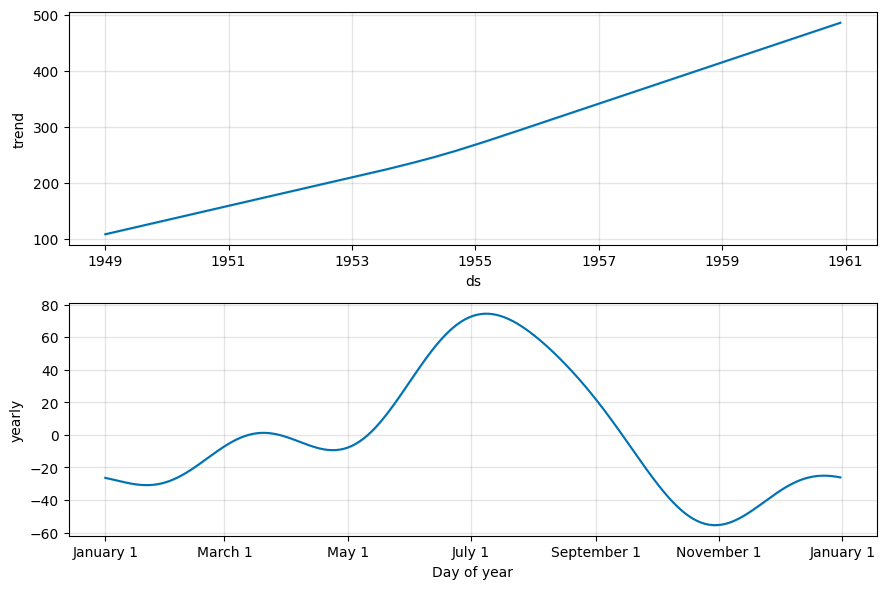

In [6]:
fig_a2 = model_a.plot_components(forecast_a)
plt.show()

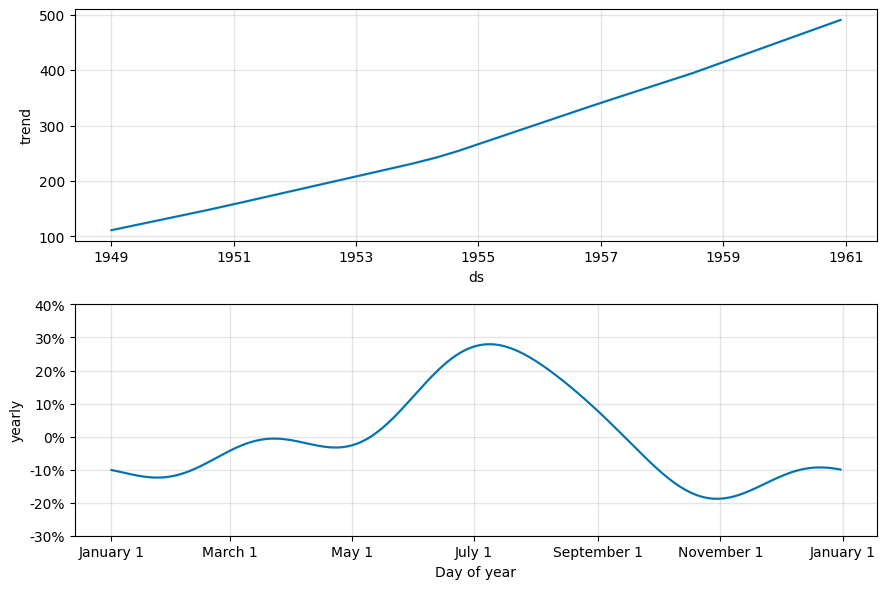

In [7]:
fig_m2 = model_m.plot_components(forecast_m)
plt.show()

They look almost identical. The trend is the same, starting in 1949 just above 100 and rising to just below 500 by 1961 with a slight kink in 1954 where the trend accelerates. The yearly seasonality behaves as we night expect with the peak number of air passengers occuring in the summer and smaller local peaks over the Chrismas holidays and spring break. The difference between the 2 charts is the y axis of the seasonality curve.


In the additive model, the y-axis values are absolute numbers. In the multiplicative model, theya re a percentage. This is because, in the additive seasoanlity mode, the seasonality is modeled as an additional factor to the trend with vaclues simply being added to or subtracted from it. But in the multiplicative seasonality mode, the seasonality represents a relative deviation from the trend, so the magnitude of the seasonality effect will depend on what value the trend is predicting at the point; the seasonality effect ios a percentage of the trend.


When our data represents a count of something over time, such as the count of airline passengers each month, we will often model with multiplicative seasonality. Using the additive seasonality can cause negative values to be predicted (negative 100 passengers per month, for example, not possible.) whereas multiplicative seasonality will merely shrink values closer to 0.


Choosing additive versus multiplicative seasonality can be tricky at first but if you just remember the insight that seasonality may be an absolute factor or a relative factor and observe whether the spread of the data is constant or not, you should not no proble with your models.

In [8]:
df = pd.read_csv('divvy_daily.csv')
df.head()

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow


In [9]:
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

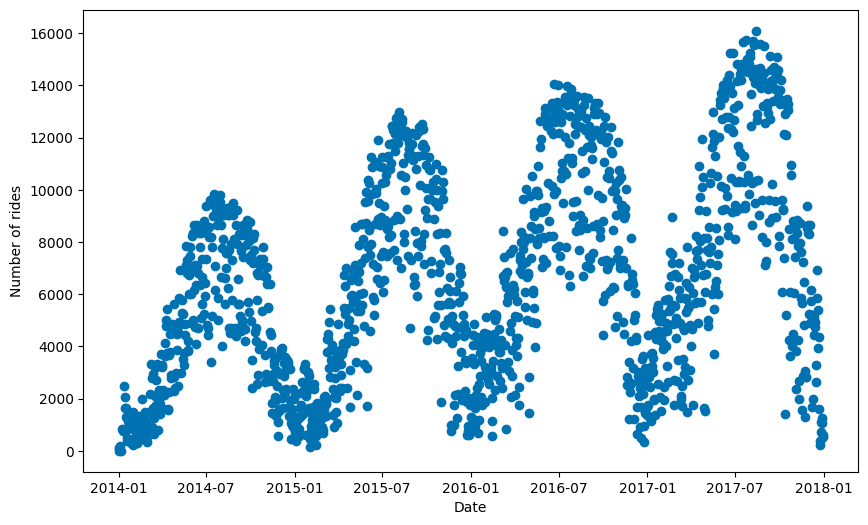

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Number of rides')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/sfaa8bak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/epn_st8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51610', 'data', 'file=/tmp/tmp8wfvctnl/sfaa8bak.json', 'init=/tmp/tmp8wfvctnl/epn_st8v.json', 'output', 'file=/tmp/tmp8wfvctnl/prophet_model1qmit1ex/prophet_model-20230727095458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:54:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:54:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


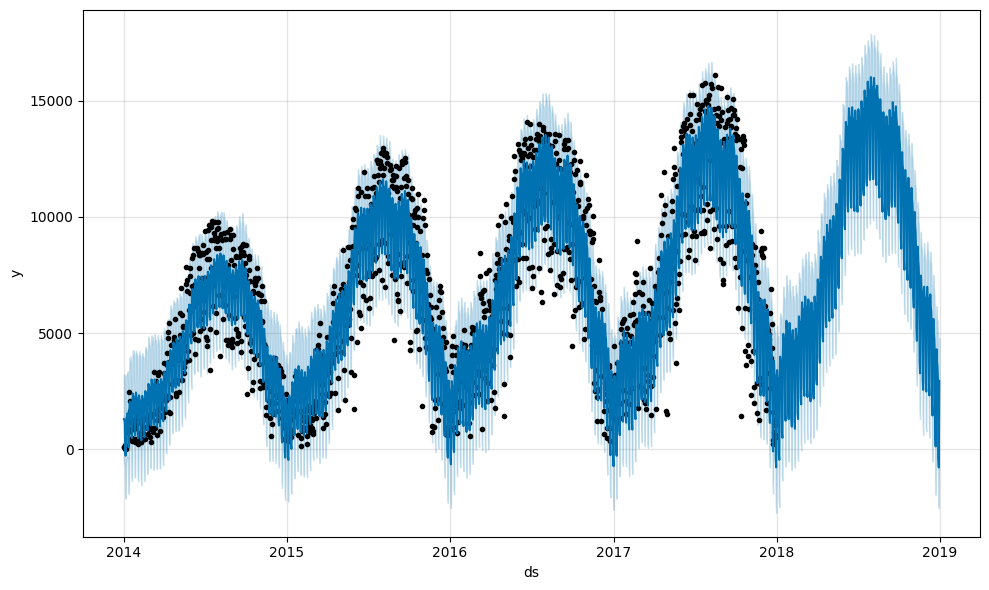

In [11]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

A Fourier series is simply a sum of sine waves. By chaing the shape of these individual sine waves - the amplitude or height of the wave; period or distance from peak to pleak and the phase or where along the length of the wave the cycle begins - we can create a new and very complex wave shape.


increasing the Fourier order in our model , we can always achieve a perfect fit for any set of data. This approach will inevitable lead to overfitting as similar to the linear regression.

By default, Prophet fits yearly seasonality with an order of 10, weekly seasonality with an order of 3 and daily seasonality (if sub-daily data is provided of course) with an order of 4. Usually, these defaults work very well and no tuning is needed. Howver, in Divvy's case, we do need to reduce Fourier order of the yearly seasonality to achieve a better fit with the data.


Now we will set the seasonality mode to multiplicative and we will include the yearly_seasonality argument and set it to 4. This is where we set the Fourier order.


You can experiment with various value for the yearly_seasonality but I found it is the best value as it provide a clean curve without miuch flexibility in most cases .


The reason why we se the seasonality_mode to multiplicative is because we noticed when plotting the raw data that the seasonality fluctuations grew with the increasing trend.

In [12]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/gbcg07q4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/jv2g3n7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5002', 'data', 'file=/tmp/tmp8wfvctnl/gbcg07q4.json', 'init=/tmp/tmp8wfvctnl/jv2g3n7a.json', 'output', 'file=/tmp/tmp8wfvctnl/prophet_modeljmu5fa4x/prophet_model-20230727095459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:54:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:54:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


we will use a new function here to plot the yearly component. We will use plot_yearly from the Prophet's plot package.

In [13]:
from prophet.plot import plot_yearly

There is also a plot_weekly function which operates much the same way. Both functions require the first argument to be the model here we will also include the optional figure size arguement so that it matches the scale of the plot

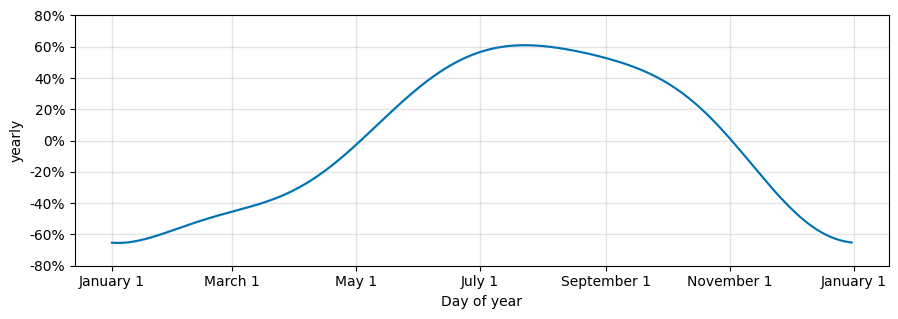

In [14]:
fig3 = plot_yearly(model, figsize = (10.5,3.25))
plt.show()

We did successfully eliminate the waveiness while still maining the clear shape of the seasonality. This seems much more readable,

The only seasonalities that we work so far are the defaults in Prophet: yearly, weekly, and daily but there is no reason to limit ourselves to seasonalities. If our data contains a cycle that is either longer or shorter than 365 25 days yearly cycle , the 7- day weekly cycle  or the 1 day daily cycle. Prophet makes it easy to model this seaonality by ourself.

A great example of a non-standard seasonality is the 11-year cycle of sunspots. Sunspots are regions on the Sun's surface that temporarily exhibit a much reduced temperature and hence appear mich darker than surrounding areas.

In [15]:
df = pd.read_csv('sunspots.csv', usecols=['Date', 'Monthly Mean Total Sunspot Number'])
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']

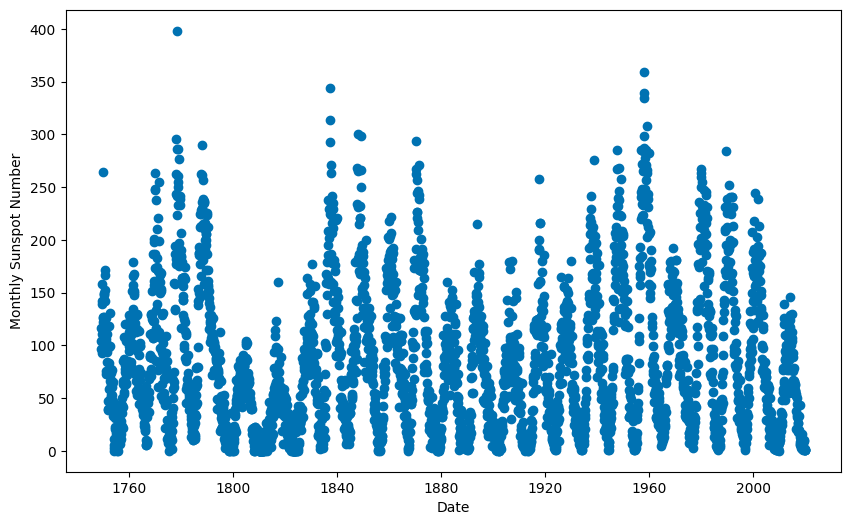

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['y'], c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Monthly Sunspot Number')
plt.show()

The data appears rather noisy. There appear to be several outliers and the cycle is not perfectly clean. There is  quite a lot variation in the peak of each cycle. To see how Prophet will handle this data, we first need to instantiate our model. This is count data so we will choose multiplicative seasonality.


Another consideration we will take is that the Sun isso large that it hardly feels the minuscule tug of Earth's gravity as we orbit around our star; therefore the Sun does not experience what we would call a yearly seasonality at all. We will instruct Prophet not to attempt to fit yearly seasonality. Prophet will not attempt a weekly or daily seasonality because we are providing monthly data.

We will juse to turn off a default seasoanlity simply pass a Boolean instead. yearly_seasonality = False to instruct Prophet not to fit yearly seasonality

In [17]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=False)

Our model has been instantiated. We cna add seasonalities. We can do this with the add_seasonality ekmthod. This method requires that we pass arguments for the saame of the seasonality (we will call this one '11 year cycle'), the period  (11 years time 365.25 days as period is stated in days) and the Fourier order we will use is 5 but feel free to experiment that.

In [18]:
model.add_seasonality(name='11-year cycle',
                      period=11 * 365.25,
                      fourier_order=5)

Statiing the period can be tricky; just remember that it is always counted in days. So a seasonality longer than a day will have a number greater than 1 and a seasonality shorter than a day will have a period less than 1.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/850chala.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/fffhl_4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21114', 'data', 'file=/tmp/tmp8wfvctnl/850chala.json', 'init=/tmp/tmp8wfvctnl/fffhl_4_.json', 'output', 'file=/tmp/tmp8wfvctnl/prophet_modelaqmro83k/prophet_model-20230727095500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:55:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:55:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


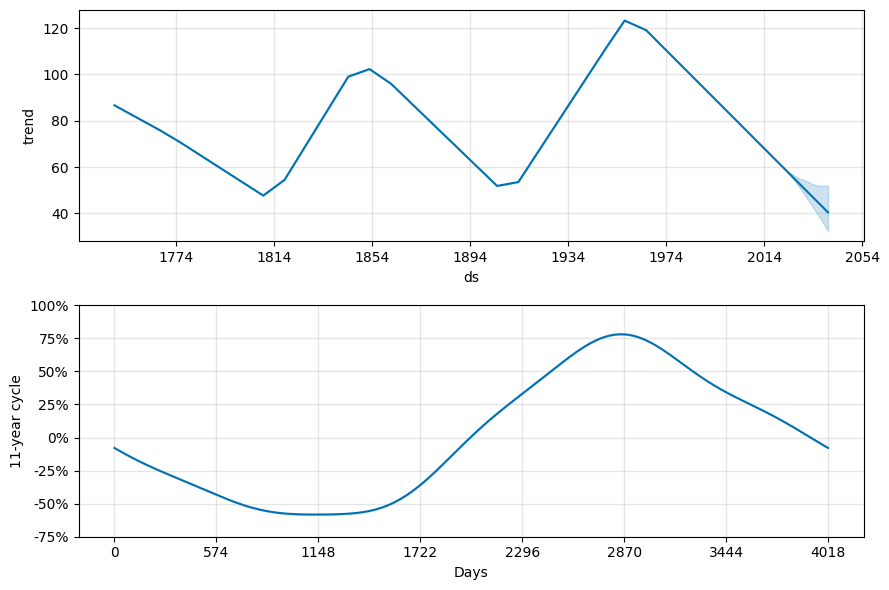

In [19]:
model.fit(df)
future = model.make_future_dataframe(periods=240, freq='M')
forecast = model.predict(future)
fig2 = model.plot_components(forecast)
plt.show()

The plot shows just the trend and the 11-year cycle which is exactly what we expeted. The trend has a sawthooth shape. With this irregular cycle, Prophet plots the x axis in days so each tick is about 1.5 years later than the previous tick. The whole cycle is indeed 11 years. We can see that the low point is a bit flatter than the high point and has about 60% fewer sunspots than the average. The high pont sees about 80% more sunspots than average.

In [20]:
model.seasonalities

OrderedDict([('11-year cycle',
              {'period': 4017.75,
               'fourier_order': 5,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

This outputs a dictaionary where the keys are the names of the seasonalities and the values are the parameters. In this example where we only have 1 seasonality.

When specifying a period for our seasonality, it is always specified in days. So a 10 year seasonality will have a period of 10*365.25 days peryear . An hourly seasonality would be 1 (day)/24 hours per day = 0.04156 days

Be careful not to confuse the period of seasonality with the period used in make_future_dataframe. The period in seasonality is always specified in days, while the period in make_future_dataframe is specified by the freq argument.


Adding a seasonality to Prophet that does not exist in the data can cause Prophet to be very slow to fit as it struggles to find a pttern where none exists. This can harm our forecast as Prophet will eventually fit the non-existent seasoanlity to nose. However, other seasonalites you might find your self frequenlty adding include an hourly seasonality if our data is measure per minute.

Seasonality for the quarterly business cycle is shown below

Adding conditional seasonalities.


Suppose you work for a utility company in a college town and are tasked with forecasting the electricity usage for the coming year. The electricity usage is going to depend on the population of the town to some extend, and as a college town, thousands of students are only temporary residents. The question is how to set up Prophet to handle this scenario.


Conditional seasoanlities are thses that are in effect for only portion of the dates int eh training and future DataFrames. A conditional seasonality must have a cycle that is shorter than the period in which it is active. So, for example, it would not make sense to have a yearly seasonality that is active for just a few months.


Forecasting electriity usage in the college town would require you to set up either daily or weekly seasonalities and possibly even both; depending on the unsage patterns, one daily/weekly seasonality for the summer months when students have retturned to their hometowns and anohter daily / weekly seasonality for the rest of the year. ideally, the conditional seasonality would have at least 2 full cycles each time it is active.


For the hourly Divvy data based ont eh weekly seasonality we observed before, the ridership is significantly lower on weekends than on weekdays suggesting most riders are commuting to work


We saw in the daily seasonality plot that ridership has usage peaks around 8 am and 6 pm during the morning and evening rush hours. This may lead to suspect ahtt the usage throughout the data will follow various patterns on a weekday versus the weekend. That is maybe these peaks we see at 8 am

and 6 pm and the nidday through will all disappear on weekends with activity levels more even throughout the day.


The basic procedure for adding this conditional seasonality is to add a new Boolean ciluns to our training dataframe and later we do need to match columns in the future dataframe indicating whether that row is a weekend or weekday, then disable the default weekly seasonality and add 2 new weekly seasonalities that specifiy those new Boolean columns as conditions.




In [22]:
df = pd.read_csv('divvy_hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

Now it is a time to create a function that outputs True if the given date is on a weekend and False otherwise. Then we will use the apply method from pandas to create a new column for weekends and use the tilde (~) operator to make the inverse results for another new column for weekdays.

In [23]:
def is_weekend(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5 or date.dayofweek == 6)

df['weekend'] = df['ds'].apply(is_weekend)
df['weekday'] = ~df['ds'].apply(is_weekend)

df.head()

,ds,y,weekend,weekday
0,2014-01-01 01:00:00,1,False,True
1,2014-01-01 02:00:00,9,False,True
2,2014-01-01 03:00:00,4,False,True
3,2014-01-01 04:00:00,1,False,True
4,2014-01-01 07:00:00,2,False,True


Jaunuary 1, 2014 was a Wednesday so taht output mathches what we would expect. Next we need to instantiate our model. We will set the seasonality mode to multiplicative because Divvy data represents count values. We also need to set the Fourier order of both yearly and weekly seasonalities to 6. This is my reference value as it works best feel free to experiment more. Finally we will add conditioanl seasonalities and wwe will disable default daily seasonality.

In [24]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6,
                weekly_seasonality=6,
                daily_seasonality=False)

To create the conditional seasonalities we will see add_seasonality and we will use the optional condition_name argument to specify the enw seasonality is conditional.


The condition_name arugment must be passed the anme of a column in the training DataFrame and consist of Boolean values identifying which rows to apply the seasonality to our weekend and weekday columns.

In [25]:
model.add_seasonality(name='daily_weekend',
                      period=1,
                      fourier_order=3,
                      condition_name='weekend')
model.add_seasonality(name='daily_weekday',
                      period=1,
                      fourier_order=3,
                      condition_name='weekday')

That is all for setting up the model next we will fit the modelm on our training data and create the future DataFrame as before but we need to set the frequency to hourly now that we are using hourly data. The last step in setting up conditional seasonalities is to identify where in the future DataFrame the condition will apply.

In [26]:
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')
future['weekend'] = future['ds'].apply(is_weekend)
future['weekday'] = ~future['ds'].apply(is_weekend)

forecast = model.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/y27exyd4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8wfvctnl/_mhwd5zb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19815', 'data', 'file=/tmp/tmp8wfvctnl/y27exyd4.json', 'init=/tmp/tmp8wfvctnl/_mhwd5zb.json', 'output', 'file=/tmp/tmp8wfvctnl/prophet_modeln_d7ydwr/prophet_model-20230727104438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:44:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:45:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


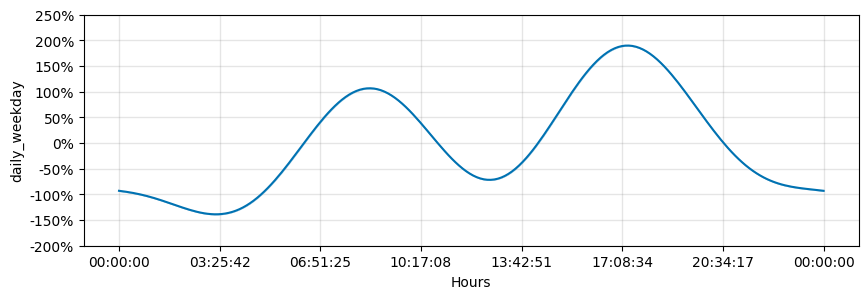

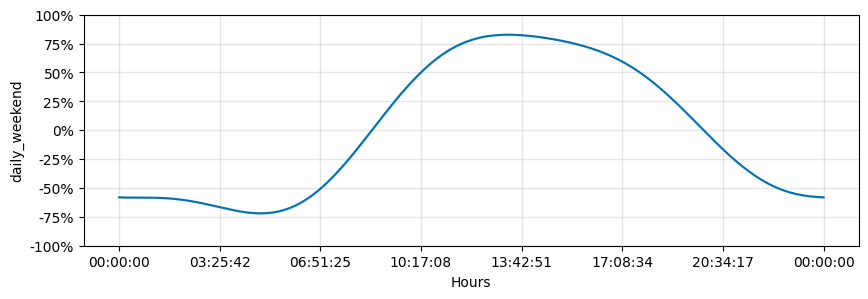

In [27]:
from prophet.plot import plot_seasonality
fig3 = plot_seasonality(model, 'daily_weekday', figsize=(10, 3))
plt.show()
fig4 = plot_seasonality(model, 'daily_weekend', figsize=(10, 3))
plt.show()

As can be seen from the first image, the trend appears much the same as we saw when we used the default daily seasonality- a peak around 8 am, another peak around 6 pm and a small  hump just after midnight.


And weekend is different. On the weekends Divvy riders tend to get a later start on the weekdays with a gradual increase in ridership up untill need and then a gradual decrease to midnigh. There is no midday slupm as we saw in working days.